# Optimization Algorithms: A Review
__Reza Javidi__, _PhD Candidate in Computational Statistical Mechanics_

_[This kerenel is under cunstruction]_

During my PhD years I had to use a lot of optimization algorithms for my computational research. Here, I share a summary of what I have used. I will keep adding algorithms to this kernel one by one. 

## 1. Gradient Descent
One of the oldest algorithms to find the minimum value of a differentiable function, $f(x)$. __Gradient__ and __Descent__ tell you that this method uses the __gradient__ of the function and __moves downward iteratively__ toward the minimum.


$$
x_{i+1}=x_i-\gamma \frac{\partial f}{\partial x_{i}},\ i \ge 0
$$
Where $\gamma$ is the learning rate, or the step size which could be constant during the whole process.


## 1.1. Python Example

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('bmh')
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}
mpl.rc('font', **font)

### Step 1: Define a function and take the derivative 
Let us define $f(x) = x^4$ and $\frac{df}{dx}=4x^3$. We know that the min value of $f(x) = x^4$ is located at $x_{min}=0$. We just want to test the algorithm.

Text(0,0.5,'f(x)')

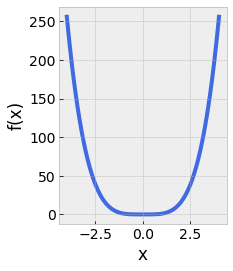

In [2]:
# Define a differentiable function and its derivative
f = lambda x: x**4
df = lambda x: 4 * x**3

# Let us plot the f(x)
fig, axes = plt.subplots(figsize=(3,4))
x = np.linspace(-4,4,num=100,endpoint=True) # define a range for x
plt.plot(x,f(x), linewidth=4,zorder=1, color='royalblue')
plt.xlabel('x')
plt.ylabel('f(x)')

### Step 2. Perform the first iteration manually
In fthe irst iteration $i=1$ and by setting the $\gamma = 0.01$, and $x_0=2$ we can calculate $x_1$:
$$
x_{i+1}=x_i-\gamma (\frac{\partial f}{\partial x_{i}}),\ i \ge 0
$$
$$
x_{1}=2-0.01\times(4\times(2)^3)\
$$
$$
x_{1}=1.68
$$
$$
x_{1}-x_{0}=1.68 -2 = -0.32
$$ 
Now we put $x_1 = 1.68$ we should do the a new iteration to find $x_2$ in iteration $i=1$

### Step 3. Now let the computer do all the iterations for you

1- xi: 2.000000, xi+1: 1.680000, diff_xi_xi_plus1: 0.320000
2- xi: 1.680000, xi+1: 1.490335, diff_xi_xi_plus1: 0.189665
3- xi: 1.490335, xi+1: 1.357928, diff_xi_xi_plus1: 0.132407
4- xi: 1.357928, xi+1: 1.257769, diff_xi_xi_plus1: 0.100159
5- xi: 1.257769, xi+1: 1.178178, diff_xi_xi_plus1: 0.079591
6- xi: 1.178178, xi+1: 1.112761, diff_xi_xi_plus1: 0.065417
7- xi: 1.112761, xi+1: 1.057646, diff_xi_xi_plus1: 0.055114
8- xi: 1.057646, xi+1: 1.010322, diff_xi_xi_plus1: 0.047324
9- xi: 1.010322, xi+1: 0.969071, diff_xi_xi_plus1: 0.041251
10- xi: 0.969071, xi+1: 0.932669, diff_xi_xi_plus1: 0.036402
11- xi: 0.932669, xi+1: 0.900217, diff_xi_xi_plus1: 0.032452
12- xi: 0.900217, xi+1: 0.871036, diff_xi_xi_plus1: 0.029181
13- xi: 0.871036, xi+1: 0.844601, diff_xi_xi_plus1: 0.026434
14- xi: 0.844601, xi+1: 0.820501, diff_xi_xi_plus1: 0.024100
15- xi: 0.820501, xi+1: 0.798406, diff_xi_xi_plus1: 0.022095
16- xi: 0.798406, xi+1: 0.778048, diff_xi_xi_plus1: 0.020358
17- xi: 0.778048, xi+1: 0.759208,

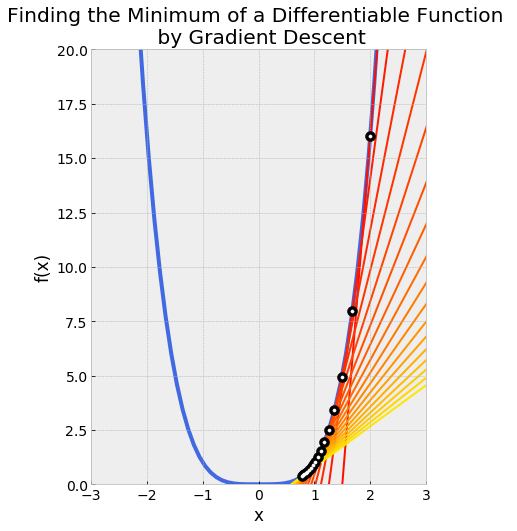

In [3]:
xi = 2 # Initial guess
diff_xi_xi_plus1 = xi

gamma = 0.01 # Step size multiplier
delta_x = 0.02 #Precision

fig, axes = plt.subplots(figsize=(6,8))
n = 20
colors = mpl.cm.autumn(np.linspace(0,1,n))

# Let us plot the f(x)
x = np.linspace(-5,5,num=100,endpoint=True) # define a range for x
plt.plot(x,f(x), linewidth=4,zorder=1, color='royalblue') # plot f(x)

#---------------------------------------------------------
# Start the iteration and keep plotting during the process
#---------------------------------------------------------
i = 1
while diff_xi_xi_plus1 > delta_x:
    # plot the gradient point
    plt.scatter(xi, f(xi), color='k', s=100, zorder=2)
    plt.scatter(xi, f(xi), color='white', s=10, zorder=3)
    
    # plot the gradient line; (x,y) for y=m(x-x0)+y0
    df_line_xrange = np.linspace(xi-3,xi+3,5)
    plt.plot(df_line_xrange, (df(xi) * (df_line_xrange - xi)) + f(xi), color=colors[i], zorder=1)

    if i == 1: xi_plus1 = xi
    xi_plus1 += -gamma * df(xi)
    diff_xi_xi_plus1 = abs(xi - xi_plus1)
    print("%d- xi: %f, xi+1: %f, diff_xi_xi_plus1: %f" % (i, xi,xi_plus1,diff_xi_xi_plus1))
    xi = xi_plus1
    i += 1

plt.ylim([0,20])
plt.xlim([-3,3])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Finding the Minimum of a Differentiable Function \n by Gradient Descent')

print("Local Minimum: %f with threshold of: %f" % (xi, delta_x))

As you can see the algorithm does a good job when initial value is far from the minimum (by taking big steps). Once it gets closer to the minimum value, step size values start decreasing which is not a good thing!